In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir("/content/drive/My Drive/Msc Project")

In [3]:
import numpy as np
import pandas as pd
import pickle

Define evaluation function

In [11]:
def evaluate(predictions, answers, topk=200):
    """

    :param predictions: Recommended items returned by the model
    :param answers: The next item the user actually clicked on
    :param topk: evaluate the first topk recommended items
    :return: ndcg and hitrate
    """
    ndcg, hitrate = [], []
    for k in range(10, topk+1, 10):
        ndcg_k = 0.0
        hitrate_k = 0.0
        num_cases = 0.0
        for user_id, item_id in answers.items():
            rank = 0
            # Find the rank of the real item in the recommended list, if exist
            while rank < k and predictions[user_id][rank][0] != item_id:
                rank += 1
            num_cases += 1
            if rank < k:
                ndcg_k += 1.0 / np.log2(rank + 2.0)
                hitrate_k += 1

        ndcg_k /= num_cases
        hitrate_k /= num_cases
        ndcg_k = float('%.4f' % ndcg_k)
        hitrate_k = float('%.4f' % hitrate_k)
        print('topk: ', k, ' : ', 'Recall: ', hitrate_k, 'NDCG : ', ndcg_k)
        ndcg.append(ndcg_k)
        hitrate.append(hitrate_k)

    return hitrate, ndcg

Convert Dataframe data format into dictionary data format

In [19]:
def get_user_item_score_dict(user_behavior):
    """
        :param user_behavior: Dataframe that records the results returned by GBDT model
        :return: user's recommendation result sequence {user1: [(item1, score1), (item2, score2)..]...}
    """
    user_behavior = user_behavior.sort_values(by=['user_id', 'pred_rank'])

    def make_item_time_pair(df):
        return list(zip(df['sim_item'], df['pred_score']))

    user_item_time_df = user_behavior.groupby('user_id')['sim_item', 'pred_score'].apply \
        (lambda x: make_item_time_pair(x)) \
        .reset_index().rename(columns={0: 'item_score_list'})
    user_item_score_dict = dict(zip(user_item_time_df['user_id'], user_item_time_df['item_score_list']))

    return user_item_score_dict

# Evaluation of the stage of generating a candidate set of recommended items

Read the ground truth of the test set

In [5]:
answer = pd.read_csv("Datasets/answer.csv", sep=',', encoding="utf-8")
answers = dict(zip(answer['user_id'], answer['item_id']))

In [9]:
item_cf_baseline = pickle.load(open('output/online/Candidate/itemcf_baseline_recall_candidate_v1.pkl', 'rb'))
user_cf_baseline = pickle.load(open('output/online/Candidate/usercf_recall_candidate_v1.pkl', 'rb'))
item_cf = pickle.load(open('output/online/Candidate/itemcf_recall_candidate.pkl', 'rb'))
user_cf = pickle.load(open('output/online/Candidate/usercf_recall_candidate.pkl', 'rb'))
srgnn_candidate = pickle.load(open('output/online/Candidate/srgnn_recall_candidate.pkl', 'rb'))

Evaluation results of unimproved item-based collaborative filtering algorithm

In [39]:
recall_itemcf_baseline, ndcg_itemcf_baseline = evaluate(item_cf_baseline, answers, topk=200)

topk:  10  :  Recall:  0.0387 NDCG :  0.0224
topk:  20  :  Recall:  0.0503 NDCG :  0.0253
topk:  30  :  Recall:  0.0592 NDCG :  0.0272
topk:  40  :  Recall:  0.0663 NDCG :  0.0286
topk:  50  :  Recall:  0.0723 NDCG :  0.0297
topk:  60  :  Recall:  0.0752 NDCG :  0.0302
topk:  70  :  Recall:  0.0795 NDCG :  0.0309
topk:  80  :  Recall:  0.085 NDCG :  0.0318
topk:  90  :  Recall:  0.0897 NDCG :  0.0325
topk:  100  :  Recall:  0.0913 NDCG :  0.0328
topk:  110  :  Recall:  0.0933 NDCG :  0.033
topk:  120  :  Recall:  0.0958 NDCG :  0.0334
topk:  130  :  Recall:  0.0975 NDCG :  0.0337
topk:  140  :  Recall:  0.0987 NDCG :  0.0338
topk:  150  :  Recall:  0.1002 NDCG :  0.034
topk:  160  :  Recall:  0.1013 NDCG :  0.0342
topk:  170  :  Recall:  0.1027 NDCG :  0.0344
topk:  180  :  Recall:  0.1032 NDCG :  0.0344
topk:  190  :  Recall:  0.1045 NDCG :  0.0346
topk:  200  :  Recall:  0.1058 NDCG :  0.0348


Evaluation results of unimproved user-based collaborative filtering algorithm

In [40]:
recall_usercf_baseline, ndcg_usercf_baseline = evaluate(user_cf_baseline, answers, topk=200)

topk:  10  :  Recall:  0.0047 NDCG :  0.0021
topk:  20  :  Recall:  0.0072 NDCG :  0.0027
topk:  30  :  Recall:  0.0097 NDCG :  0.0032
topk:  40  :  Recall:  0.0113 NDCG :  0.0036
topk:  50  :  Recall:  0.014 NDCG :  0.004
topk:  60  :  Recall:  0.0155 NDCG :  0.0043
topk:  70  :  Recall:  0.019 NDCG :  0.0049
topk:  80  :  Recall:  0.0208 NDCG :  0.0052
topk:  90  :  Recall:  0.0225 NDCG :  0.0054
topk:  100  :  Recall:  0.0248 NDCG :  0.0058
topk:  110  :  Recall:  0.028 NDCG :  0.0063
topk:  120  :  Recall:  0.03 NDCG :  0.0065
topk:  130  :  Recall:  0.0325 NDCG :  0.0069
topk:  140  :  Recall:  0.035 NDCG :  0.0073
topk:  150  :  Recall:  0.0365 NDCG :  0.0075
topk:  160  :  Recall:  0.0383 NDCG :  0.0077
topk:  170  :  Recall:  0.041 NDCG :  0.0081
topk:  180  :  Recall:  0.0427 NDCG :  0.0083
topk:  190  :  Recall:  0.0442 NDCG :  0.0085
topk:  200  :  Recall:  0.0463 NDCG :  0.0088


Evaluation results of improved item-based collaborative filtering algorithm

In [41]:
recall_itemcf_improved, ndcg_itemcf_improved = evaluate(item_cf, answers, topk=200)

topk:  10  :  Recall:  0.0447 NDCG :  0.0253
topk:  20  :  Recall:  0.0592 NDCG :  0.029
topk:  30  :  Recall:  0.0717 NDCG :  0.0317
topk:  40  :  Recall:  0.0798 NDCG :  0.0332
topk:  50  :  Recall:  0.0857 NDCG :  0.0343
topk:  60  :  Recall:  0.091 NDCG :  0.0352
topk:  70  :  Recall:  0.0958 NDCG :  0.036
topk:  80  :  Recall:  0.0992 NDCG :  0.0365
topk:  90  :  Recall:  0.1022 NDCG :  0.037
topk:  100  :  Recall:  0.1043 NDCG :  0.0373
topk:  110  :  Recall:  0.1068 NDCG :  0.0377
topk:  120  :  Recall:  0.1087 NDCG :  0.038
topk:  130  :  Recall:  0.1112 NDCG :  0.0383
topk:  140  :  Recall:  0.1127 NDCG :  0.0385
topk:  150  :  Recall:  0.114 NDCG :  0.0387
topk:  160  :  Recall:  0.1157 NDCG :  0.0389
topk:  170  :  Recall:  0.1163 NDCG :  0.039
topk:  180  :  Recall:  0.1177 NDCG :  0.0392
topk:  190  :  Recall:  0.119 NDCG :  0.0394
topk:  200  :  Recall:  0.1202 NDCG :  0.0395


Evaluation results of improved user-based collaborative filtering algorithm

In [42]:
recall_usercf_improved, ndcg_usercf_improved = evaluate(user_cf, answers, topk=200)

topk:  10  :  Recall:  0.0047 NDCG :  0.0025
topk:  20  :  Recall:  0.0075 NDCG :  0.0032
topk:  30  :  Recall:  0.0107 NDCG :  0.0039
topk:  40  :  Recall:  0.0128 NDCG :  0.0043
topk:  50  :  Recall:  0.0155 NDCG :  0.0048
topk:  60  :  Recall:  0.017 NDCG :  0.0051
topk:  70  :  Recall:  0.0193 NDCG :  0.0055
topk:  80  :  Recall:  0.0228 NDCG :  0.006
topk:  90  :  Recall:  0.0258 NDCG :  0.0065
topk:  100  :  Recall:  0.0293 NDCG :  0.007
topk:  110  :  Recall:  0.0323 NDCG :  0.0075
topk:  120  :  Recall:  0.0352 NDCG :  0.0079
topk:  130  :  Recall:  0.0377 NDCG :  0.0082
topk:  140  :  Recall:  0.041 NDCG :  0.0087
topk:  150  :  Recall:  0.0437 NDCG :  0.0091
topk:  160  :  Recall:  0.0478 NDCG :  0.0096
topk:  170  :  Recall:  0.0507 NDCG :  0.01
topk:  180  :  Recall:  0.053 NDCG :  0.0103
topk:  190  :  Recall:  0.0557 NDCG :  0.0107
topk:  200  :  Recall:  0.0593 NDCG :  0.0112


Evaluation results of SR-GNN

In [43]:
recall_srgnn, ndcg_srgnn = evaluate(srgnn_candidate, answers, topk=200)

topk:  10  :  Recall:  0.0772 NDCG :  0.0463
topk:  20  :  Recall:  0.1057 NDCG :  0.0535
topk:  30  :  Recall:  0.1213 NDCG :  0.0568
topk:  40  :  Recall:  0.134 NDCG :  0.0592
topk:  50  :  Recall:  0.1457 NDCG :  0.0613
topk:  60  :  Recall:  0.1555 NDCG :  0.063
topk:  70  :  Recall:  0.1632 NDCG :  0.0643
topk:  80  :  Recall:  0.1725 NDCG :  0.0658
topk:  90  :  Recall:  0.1817 NDCG :  0.0672
topk:  100  :  Recall:  0.1875 NDCG :  0.0681
topk:  110  :  Recall:  0.1925 NDCG :  0.0688
topk:  120  :  Recall:  0.1995 NDCG :  0.0699
topk:  130  :  Recall:  0.2052 NDCG :  0.0707
topk:  140  :  Recall:  0.2093 NDCG :  0.0713
topk:  150  :  Recall:  0.2138 NDCG :  0.0719
topk:  160  :  Recall:  0.2177 NDCG :  0.0724
topk:  170  :  Recall:  0.2228 NDCG :  0.0731
topk:  180  :  Recall:  0.2275 NDCG :  0.0737
topk:  190  :  Recall:  0.2313 NDCG :  0.0742
topk:  200  :  Recall:  0.2347 NDCG :  0.0747


# Evaluation of the ranking stage

Read the results returned by LGBRanker model

In [78]:
itemcf_rank_df = pd.read_csv("output/rank/itemcf/tst_lgb_ranker_feats.csv")
itemcf_rank_df["pred_rank"] = itemcf_rank_df["pred_rank"].astype(int)
usercf_rank_df = pd.read_csv("output/rank/usercf/tst_lgb_ranker_feats.csv")
usercf_rank_df["pred_rank"] = usercf_rank_df["pred_rank"].astype(int)
srgnn_rank_df = pd.read_csv("output/rank/srgnn/tst_lgb_ranker_feats.csv")
srgnn_rank_df["pred_rank"] = srgnn_rank_df["pred_rank"].astype(int)

Convert the rank result into a dictionary data format

In [79]:
itemcf_rank_answer = get_user_item_score_dict(itemcf_rank_df)
usercf_rank_answer = get_user_item_score_dict(usercf_rank_df)
srgnn_rank_answer = get_user_item_score_dict(srgnn_rank_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


Rank evaluation result of candidate set returned by item-based collaborative filtering algorithm

In [80]:
itemcf_rank_recall, itemcf_rank_ndcg = evaluate(itemcf_rank_answer, answers, topk=200)

topk:  10  :  Recall:  0.0595 NDCG :  0.0357
topk:  20  :  Recall:  0.0767 NDCG :  0.0401
topk:  30  :  Recall:  0.0873 NDCG :  0.0423
topk:  40  :  Recall:  0.094 NDCG :  0.0436
topk:  50  :  Recall:  0.0985 NDCG :  0.0444
topk:  60  :  Recall:  0.1035 NDCG :  0.0453
topk:  70  :  Recall:  0.1068 NDCG :  0.0459
topk:  80  :  Recall:  0.1088 NDCG :  0.0462
topk:  90  :  Recall:  0.1102 NDCG :  0.0464
topk:  100  :  Recall:  0.1115 NDCG :  0.0466
topk:  110  :  Recall:  0.1132 NDCG :  0.0468
topk:  120  :  Recall:  0.1142 NDCG :  0.047
topk:  130  :  Recall:  0.1157 NDCG :  0.0472
topk:  140  :  Recall:  0.1165 NDCG :  0.0473
topk:  150  :  Recall:  0.1178 NDCG :  0.0475
topk:  160  :  Recall:  0.1187 NDCG :  0.0476
topk:  170  :  Recall:  0.1193 NDCG :  0.0477
topk:  180  :  Recall:  0.1195 NDCG :  0.0477
topk:  190  :  Recall:  0.12 NDCG :  0.0478
topk:  200  :  Recall:  0.1202 NDCG :  0.0478


Rank evaluation result of candidate set returned by user-based collaborative filtering algorithm

In [81]:
usercf_rank_recall, usercf_rank_ndcg = evaluate(usercf_rank_answer, answers, topk=200)

topk:  10  :  Recall:  0.0268 NDCG :  0.0168
topk:  20  :  Recall:  0.0353 NDCG :  0.019
topk:  30  :  Recall:  0.0407 NDCG :  0.0201
topk:  40  :  Recall:  0.0437 NDCG :  0.0207
topk:  50  :  Recall:  0.0463 NDCG :  0.0212
topk:  60  :  Recall:  0.0477 NDCG :  0.0214
topk:  70  :  Recall:  0.0495 NDCG :  0.0217
topk:  80  :  Recall:  0.0512 NDCG :  0.022
topk:  90  :  Recall:  0.0525 NDCG :  0.0222
topk:  100  :  Recall:  0.0528 NDCG :  0.0222
topk:  110  :  Recall:  0.0545 NDCG :  0.0225
topk:  120  :  Recall:  0.0552 NDCG :  0.0226
topk:  130  :  Recall:  0.0558 NDCG :  0.0227
topk:  140  :  Recall:  0.0567 NDCG :  0.0228
topk:  150  :  Recall:  0.057 NDCG :  0.0228
topk:  160  :  Recall:  0.0573 NDCG :  0.0229
topk:  170  :  Recall:  0.0575 NDCG :  0.0229
topk:  180  :  Recall:  0.058 NDCG :  0.023
topk:  190  :  Recall:  0.059 NDCG :  0.0231
topk:  200  :  Recall:  0.0593 NDCG :  0.0231


Rank evaluation result of candidate set returned by SR-GNN

In [82]:
srgnn_rank_recall, srgnn_rank_ndcg = evaluate(srgnn_rank_answer, answers, topk=200)

topk:  10  :  Recall:  0.0782 NDCG :  0.0473
topk:  20  :  Recall:  0.1085 NDCG :  0.055
topk:  30  :  Recall:  0.1255 NDCG :  0.0586
topk:  40  :  Recall:  0.1355 NDCG :  0.0605
topk:  50  :  Recall:  0.1492 NDCG :  0.063
topk:  60  :  Recall:  0.1575 NDCG :  0.0645
topk:  70  :  Recall:  0.1678 NDCG :  0.0662
topk:  80  :  Recall:  0.1747 NDCG :  0.0673
topk:  90  :  Recall:  0.1815 NDCG :  0.0683
topk:  100  :  Recall:  0.1875 NDCG :  0.0692
topk:  110  :  Recall:  0.1945 NDCG :  0.0703
topk:  120  :  Recall:  0.2003 NDCG :  0.0711
topk:  130  :  Recall:  0.2047 NDCG :  0.0717
topk:  140  :  Recall:  0.2088 NDCG :  0.0723
topk:  150  :  Recall:  0.212 NDCG :  0.0728
topk:  160  :  Recall:  0.2163 NDCG :  0.0734
topk:  170  :  Recall:  0.2232 NDCG :  0.0743
topk:  180  :  Recall:  0.2277 NDCG :  0.0749
topk:  190  :  Recall:  0.2317 NDCG :  0.0754
topk:  200  :  Recall:  0.2347 NDCG :  0.0758


Read the results returned by LGBMClassifier model

In [83]:
itemcf_cls_df = pd.read_csv("output/rank/itemcf/tst_lgb_cls_feats.csv")
itemcf_cls_df["pred_rank"] = itemcf_rank_df["pred_rank"].astype(int)
usercf_cls_df = pd.read_csv("output/rank/usercf/tst_lgb_cls_feats.csv")
usercf_cls_df["pred_rank"] = usercf_rank_df["pred_rank"].astype(int)
srgnn_cls_df = pd.read_csv("output/rank/srgnn/tst_lgb_cls_feats.csv")
srgnn_cls_df["pred_rank"] = srgnn_rank_df["pred_rank"].astype(int)

Convert the rank result into a dictionary data format

In [84]:
itemcf_cls_answer = get_user_item_score_dict(itemcf_cls_df)
usercf_cls_answer = get_user_item_score_dict(usercf_cls_df)
srgnn_cls_answer = get_user_item_score_dict(srgnn_cls_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


Rank evaluation result of candidate set returned by item-based collaborative filtering algorithm

In [85]:
itemcf_cls_recall, itemcf_cls_ndcg = evaluate(itemcf_cls_answer, answers, topk=200)

topk:  10  :  Recall:  0.0595 NDCG :  0.0357
topk:  20  :  Recall:  0.0767 NDCG :  0.0401
topk:  30  :  Recall:  0.0873 NDCG :  0.0423
topk:  40  :  Recall:  0.094 NDCG :  0.0436
topk:  50  :  Recall:  0.0985 NDCG :  0.0444
topk:  60  :  Recall:  0.1035 NDCG :  0.0453
topk:  70  :  Recall:  0.1068 NDCG :  0.0459
topk:  80  :  Recall:  0.1088 NDCG :  0.0462
topk:  90  :  Recall:  0.1102 NDCG :  0.0464
topk:  100  :  Recall:  0.1115 NDCG :  0.0466
topk:  110  :  Recall:  0.1132 NDCG :  0.0468
topk:  120  :  Recall:  0.1142 NDCG :  0.047
topk:  130  :  Recall:  0.1157 NDCG :  0.0472
topk:  140  :  Recall:  0.1165 NDCG :  0.0473
topk:  150  :  Recall:  0.1178 NDCG :  0.0475
topk:  160  :  Recall:  0.1187 NDCG :  0.0476
topk:  170  :  Recall:  0.1193 NDCG :  0.0477
topk:  180  :  Recall:  0.1195 NDCG :  0.0477
topk:  190  :  Recall:  0.12 NDCG :  0.0478
topk:  200  :  Recall:  0.1202 NDCG :  0.0478


Rank evaluation result of candidate set returned by user-based collaborative filtering algorithm

In [86]:
usercf_cls_recall, usercf_cls_ndcg = evaluate(usercf_cls_answer, answers, topk=200)

topk:  10  :  Recall:  0.0268 NDCG :  0.0168
topk:  20  :  Recall:  0.0353 NDCG :  0.019
topk:  30  :  Recall:  0.0407 NDCG :  0.0201
topk:  40  :  Recall:  0.0437 NDCG :  0.0207
topk:  50  :  Recall:  0.0463 NDCG :  0.0212
topk:  60  :  Recall:  0.0477 NDCG :  0.0214
topk:  70  :  Recall:  0.0495 NDCG :  0.0217
topk:  80  :  Recall:  0.0512 NDCG :  0.022
topk:  90  :  Recall:  0.0525 NDCG :  0.0222
topk:  100  :  Recall:  0.0528 NDCG :  0.0222
topk:  110  :  Recall:  0.0545 NDCG :  0.0225
topk:  120  :  Recall:  0.0552 NDCG :  0.0226
topk:  130  :  Recall:  0.0558 NDCG :  0.0227
topk:  140  :  Recall:  0.0567 NDCG :  0.0228
topk:  150  :  Recall:  0.057 NDCG :  0.0228
topk:  160  :  Recall:  0.0573 NDCG :  0.0229
topk:  170  :  Recall:  0.0575 NDCG :  0.0229
topk:  180  :  Recall:  0.058 NDCG :  0.023
topk:  190  :  Recall:  0.059 NDCG :  0.0231
topk:  200  :  Recall:  0.0593 NDCG :  0.0231


Rank evaluation result of candidate set returned by SR-GNN

In [87]:
srgnn_cls_recall, srgnn_cls_ndcg = evaluate(srgnn_cls_answer, answers, topk=200)

topk:  10  :  Recall:  0.0782 NDCG :  0.0473
topk:  20  :  Recall:  0.1085 NDCG :  0.055
topk:  30  :  Recall:  0.1255 NDCG :  0.0586
topk:  40  :  Recall:  0.1355 NDCG :  0.0605
topk:  50  :  Recall:  0.1492 NDCG :  0.063
topk:  60  :  Recall:  0.1575 NDCG :  0.0645
topk:  70  :  Recall:  0.1678 NDCG :  0.0662
topk:  80  :  Recall:  0.1747 NDCG :  0.0673
topk:  90  :  Recall:  0.1815 NDCG :  0.0683
topk:  100  :  Recall:  0.1875 NDCG :  0.0692
topk:  110  :  Recall:  0.1945 NDCG :  0.0703
topk:  120  :  Recall:  0.2003 NDCG :  0.0711
topk:  130  :  Recall:  0.2047 NDCG :  0.0717
topk:  140  :  Recall:  0.2088 NDCG :  0.0723
topk:  150  :  Recall:  0.212 NDCG :  0.0728
topk:  160  :  Recall:  0.2163 NDCG :  0.0734
topk:  170  :  Recall:  0.2232 NDCG :  0.0743
topk:  180  :  Recall:  0.2277 NDCG :  0.0749
topk:  190  :  Recall:  0.2317 NDCG :  0.0754
topk:  200  :  Recall:  0.2347 NDCG :  0.0758


# Data visualization

In [36]:
def get_all_click_data(mode):
    """

    :param mode:
    :return:
    """
    train_data_path = "Datasets/train.csv"
    train_data = pd.read_csv(
        train_data_path,
        sep=',',
        encoding='utf-8'
    )
    if mode == "offline":
        test_data = None
        return train_data, test_data
    elif mode == "online":
        test_data_path = "Datasets/test.csv"
        test_data = pd.read_csv(
            test_data_path,
            sep=',',
            encoding='utf-8'
        )
        all_click = train_data.append(test_data)
        all_click = all_click.drop_duplicates(['user_id', 'item_id', 'timestamp'], keep='last')
        return all_click, test_data

In [37]:
all_click, test_data = get_all_click_data("offline")
temp = all_click.sort_values('timestamp')
temp['next_item'] = temp.groupby(['user_id'])['item_id'].transform(lambda x: x.shift(-1))
union_item = temp.groupby(['item_id', 'next_item'])['timestamp'].agg({'count'}).reset_index().sort_values('count', ascending=False)
union_item[['count']].describe()

,count
count,972195.000000
mean,1.049494
std,0.408900
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


<function matplotlib.pyplot.show>

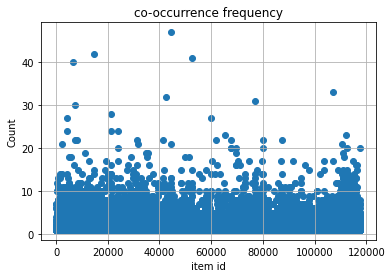

In [38]:
import matplotlib.pyplot as plt
x = union_item['item_id']
y = union_item['count']
plt.title('co-occurrence frequency')
plt.scatter(x,y)
plt.xlabel('item id')
plt.ylabel('Count')
plt.grid()
plt.show

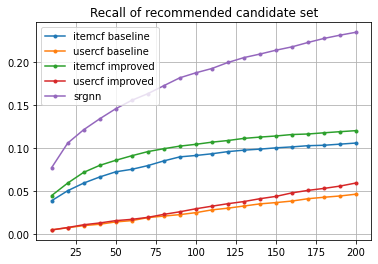

In [49]:
import matplotlib.pyplot as plt
x = [i for i in range(10, 201, 10)]
plt.title('Recall of recommended candidate set')
plt.plot(x, recall_itemcf_baseline, '.-', label='itemcf baseline')
plt.plot(x, recall_usercf_baseline, '.-', label='usercf baseline')
plt.plot(x, recall_itemcf_improved, '.-', label='itemcf improved')
plt.plot(x, recall_usercf_improved, '.-', label='usercf improved')
plt.plot(x, recall_srgnn, '.-', label="srgnn")
plt.legend()
plt.grid()
plt.show()

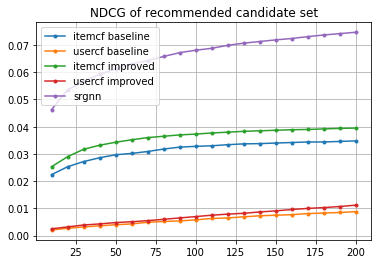

In [50]:
import matplotlib.pyplot as plt
x = [i for i in range(10, 201, 10)]
plt.title('NDCG of recommended candidate set')
plt.plot(x, ndcg_itemcf_baseline, '.-', label='itemcf baseline')
plt.plot(x, ndcg_usercf_baseline, '.-', label='usercf baseline')
plt.plot(x, ndcg_itemcf_improved, '.-', label='itemcf improved')
plt.plot(x, ndcg_usercf_improved, '.-', label='usercf improved')
plt.plot(x, ndcg_srgnn, '.-', label="srgnn")
plt.legend()
plt.grid()
plt.show()

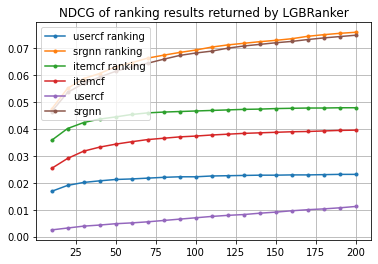

In [100]:
import matplotlib.pyplot as plt
x = [i for i in range(10, 201, 10)]
plt.title('NDCG of ranking results returned by LGBRanker')

plt.plot(x, usercf_rank_ndcg, '.-', label='usercf ranking')
plt.plot(x, srgnn_rank_ndcg, '.-', label='srgnn ranking')
plt.plot(x, itemcf_rank_ndcg, '.-', label='itemcf ranking')
plt.plot(x, ndcg_itemcf_improved, '.-', label='itemcf')
plt.plot(x, ndcg_usercf_improved, '.-', label='usercf')
plt.plot(x, ndcg_srgnn, '.-', label="srgnn")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

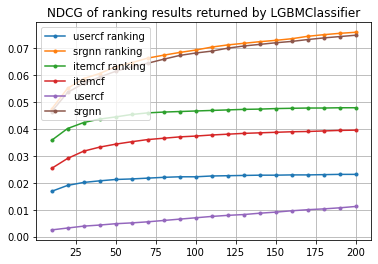

In [101]:
import matplotlib.pyplot as plt
x = [i for i in range(10, 201, 10)]
plt.title('NDCG of ranking results returned by LGBMClassifier')

plt.plot(x, usercf_cls_ndcg, '.-', label='usercf ranking')
plt.plot(x, srgnn_cls_ndcg, '.-', label='srgnn ranking')
plt.plot(x, itemcf_cls_ndcg, '.-', label='itemcf ranking')
plt.plot(x, ndcg_itemcf_improved, '.-', label='itemcf')
plt.plot(x, ndcg_usercf_improved, '.-', label='usercf')
plt.plot(x, ndcg_srgnn, '.-', label="srgnn")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()